In [54]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [55]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
all_data = [train_data, test_data]



In [56]:
# shape
print(train_data.shape)


(891, 12)


In [57]:
# head
print(train_data.head(20))


    PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   
15           16         1       2   
16           17         0       3   
17           18         1       2   
18           19         0       3   
19           20         1       3   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.

In [58]:
#Feature 1: Pclass
print( train_data[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean() )

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [59]:
#Feature 2: Sex
print( train_data[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean() )

      Sex  Survived
0  female  0.742038
1    male  0.188908


In [60]:
#Feature 3: Family Size
for data in all_data:
    data['family_size'] = data['SibSp'] + data['Parch'] + 1
print( train_data[["family_size","Survived"]].groupby(["family_size"], as_index = False).mean() )

   family_size  Survived
0            1  0.303538
1            2  0.552795
2            3  0.578431
3            4  0.724138
4            5  0.200000
5            6  0.136364
6            7  0.333333
7            8  0.000000
8           11  0.000000


In [61]:

#Libraries
import pandas as pd

#Training (891 Entries) & Testing (417 Entries) data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
all_data = [train_data, test_data]
passenger_id = test_data['PassengerId']

#Feature 3: Family Size
for data in all_data:
    data['family_size'] = data['SibSp'] + data['Parch'] + 1

#Feature 3.1: Is alone?
for data in all_data:
    data['is_alone'] = 0
    data.loc[data['family_size'] == 1, 'is_alone'] = 1
print (train_data[['is_alone', 'Survived']].groupby(['is_alone'], as_index=False).mean())

   is_alone  Survived
0         0  0.505650
1         1  0.303538


In [62]:
#Age has some missing values. We will fill it with random numbers between 
#(average age minus average standard deviation) and (average age plus average standard deviation). 
#After that, we will group it in the set of 5. It has a good impact as well.

#Feature 6: Age
for data in all_data:
    age_avg  = data['Age'].mean()
    age_std  = data['Age'].std()
    age_null = data['Age'].isnull().sum()

    random_list = np.random.randint(age_avg - age_std, age_avg + age_std , size = age_null)
    data['Age'][np.isnan(data['Age'])] = random_list
    data['Age'] = data['Age'].astype(int)

train_data['category_age'] = pd.cut(train_data['Age'], 5)
print( train_data[["category_age","Survived"]].groupby(["category_age"], as_index = False).mean() )


    category_age  Survived
0  (-0.08, 16.0]  0.483333
1   (16.0, 32.0]  0.349537
2   (32.0, 48.0]  0.393822
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


C:\Users\Richard\Anaconda36\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [63]:
# descriptions
print(train_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.581369    0.523008   
std     257.353842    0.486592    0.836071   13.591341    1.102743   
min       1.000000    0.000000    1.000000    0.000000    0.000000   
25%     223.500000    0.000000    2.000000   20.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  family_size    is_alone  
count  891.000000  891.000000   891.000000  891.000000  
mean     0.381594   32.204208     1.904602    0.602694  
std      0.806057   49.693429     1.613459    0.489615  
min      0.000000    0.000000     1.000000    0.000000  
25%      0.000000    7.910400     1.000000    0.000000  
50%      0.000000   14.4542

In [64]:
# class distribution
print(train_data.groupby('Survived').size())

Survived
0    549
1    342
dtype: int64


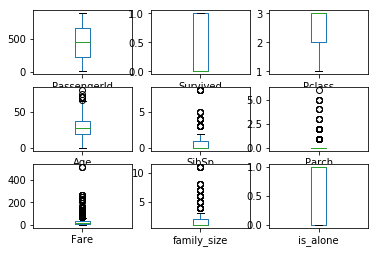

In [65]:
# box and whisker plots
train_data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

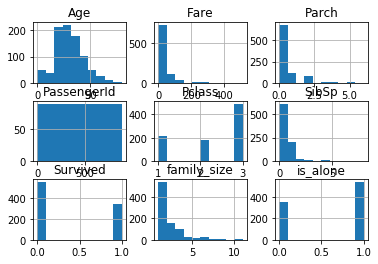

In [66]:
# histograms
train_data.hist()
plt.show()


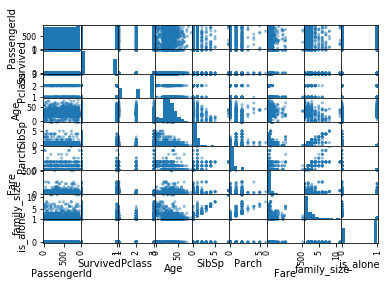

In [67]:
# scatter plot matrix
scatter_matrix(train_data)
plt.show()

In [77]:
#Map Data
for data in all_data:

    #Mapping Sex
    sex_map = { 'female':0 , 'male':1 }
    data['Sex'] = data['Sex'].map(sex_map).astype(int)

    #Mapping Title
    title_map = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Rare':5}
    data['title'] = data['title'].map(title_map)
    data['title'] = data['title'].fillna(0)

    #Mapping Embarked
    embark_map = {'S':0, 'C':1, 'Q':2}
    data['Embarked'] = data['Embarked'].map(embark_map).astype(int)

    #Mapping Fare
    data.loc[ data['Fare'] <= 7.91, 'Fare']                            = 0
    data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare'] = 1
    data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare']   = 2
    data.loc[ data['Fare'] > 31, 'Fare']                               = 3
    data['Fare'] = data['Fare'].astype(int)

    #Mapping Age
    data.loc[ data['Age'] <= 16, 'Age']                       = 0
    data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age'] = 1
    data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 2
    data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 3
    data.loc[ data['Age'] > 64, 'Age']                        = 4

#Feature Selection
#Create list of columns to drop
drop_elements = ["Name", "Ticket", "Cabin", "SibSp", "Parch", "family_size"]

#Drop columns from both data sets
train_data = train_data.drop(drop_elements, axis = 1)
train_data = train_data.drop(['PassengerId','category_fare', 'category_age'], axis = 1)
test_data = test_data.drop(drop_elements, axis = 1)

#Print ready to use data
print(train_data.head(10))

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [68]:
# Split-out validation train_data
array = train_data.values
X = array[:,2:]
Y = array[:,1]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [69]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [70]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

TypeError: float() argument must be a string or a number, not 'pandas._libs.interval.Interval'